In [3]:
!pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 45.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 83.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 73.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from pdpbox import pdp,info_plots
import shap
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve, ClassificationReport
from yellowbrick.model_selection import LearningCurve, ValidationCurve, learning_curve
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
df=pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')
print(df.shape)

(11162, 17)


In [6]:
#checking for duplicated rows and missing values
print(df.duplicated().sum())
print(df.isnull().sum().sum())

0
0


In [7]:
#checking types
df.dtypes.sort_values()

age           int64
previous      int64
pdays         int64
campaign      int64
duration      int64
balance       int64
day           int64
month        object
contact      object
loan         object
housing      object
default      object
education    object
marital      object
job          object
poutcome     object
deposit      object
dtype: object

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [10]:
df.drop("duration",axis=1, inplace=True)

In [11]:
#checking class balance
df.deposit.value_counts()/df.deposit.count()


deposit
no     0.52616
yes    0.47384
Name: count, dtype: float64

In [12]:
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(df.drop("deposit",axis=1), df.deposit):
    traindf=df.loc[train_index] #to select only rows (with all columns) we dont need comma and colon.
    testdf= df.loc[test_index]

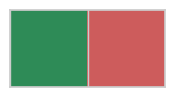

In [13]:
mypalette = ['seagreen', 'indianred']
sns.set_palette(mypalette)
sns.palplot(sns.color_palette())

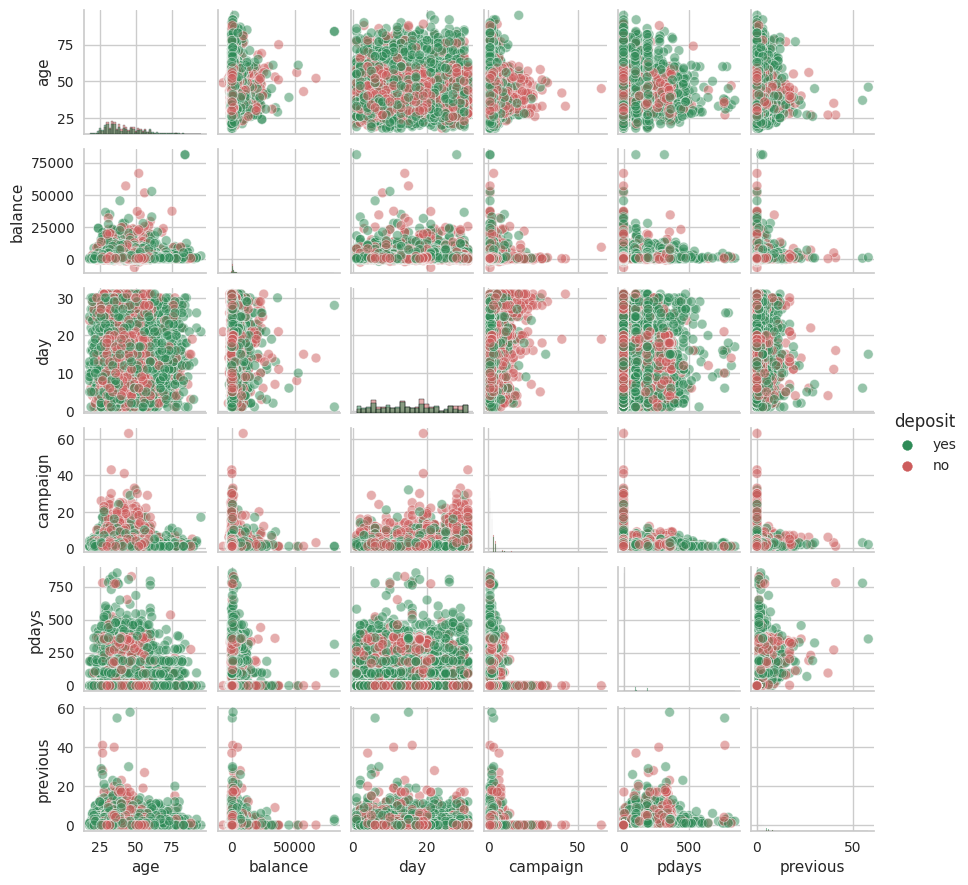

In [14]:
# Scatterplots to search for linear and non-linear relationships and histograms.
sns.pairplot(traindf, diag_kind='hist',  hue= 'deposit', height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})

<Axes: >

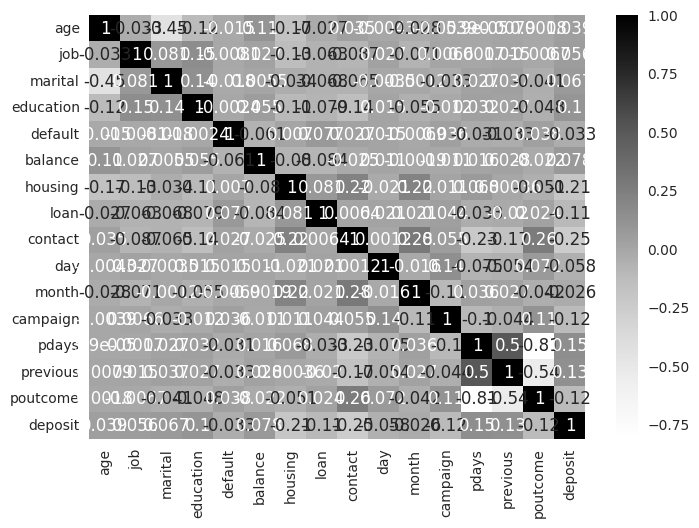

In [15]:
#Pearson’s Correlations, which measures the strength of a linear relationship
traindf['job'] = traindf['job'].astype('category').cat.codes
traindf['month'] = traindf['month'].astype('category').cat.codes
traindf['contact'] = traindf['contact'].astype('category').cat.codes
traindf['loan'] = traindf['loan'].astype('category').cat.codes
traindf['housing'] = traindf['housing'].astype('category').cat.codes
traindf['default'] = traindf['default'].astype('category').cat.codes
traindf['education'] = traindf['education'].astype('category').cat.codes
traindf['marital'] = traindf['marital'].astype('category').cat.codes
traindf['poutcome'] = traindf['poutcome'].astype('category').cat.codes
traindf['deposit'] = traindf['deposit'].astype('category').cat.codes
sns.heatmap(traindf.corr(method='pearson'), cmap="Greys", annot=True)

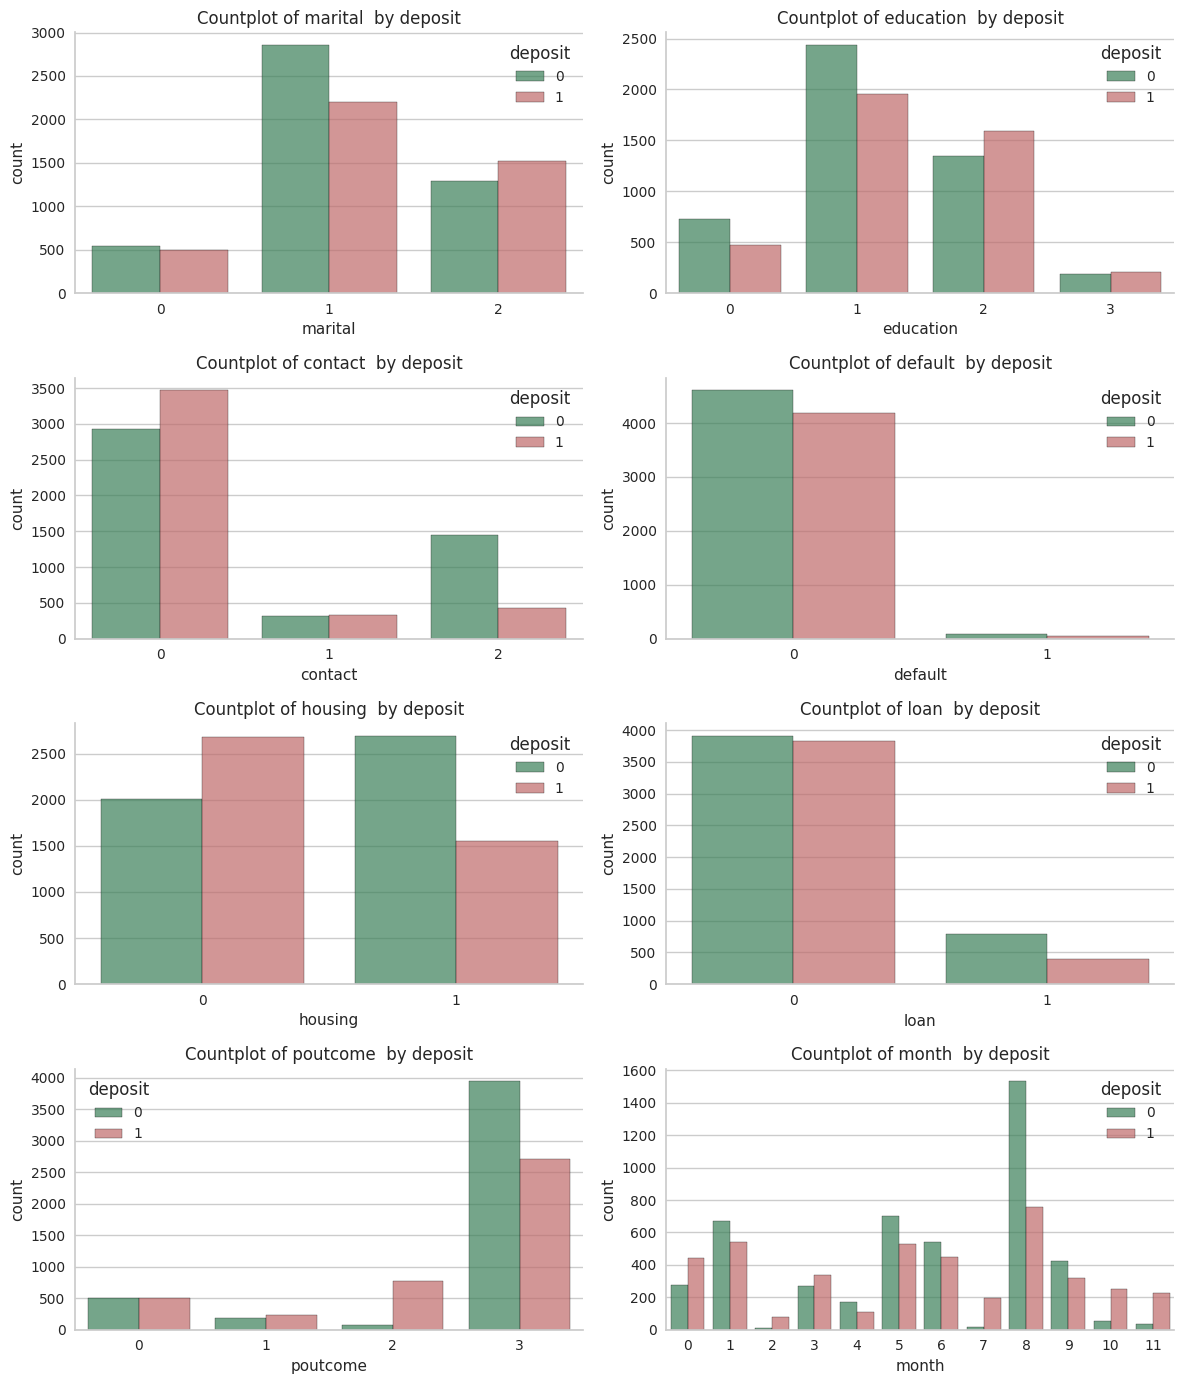

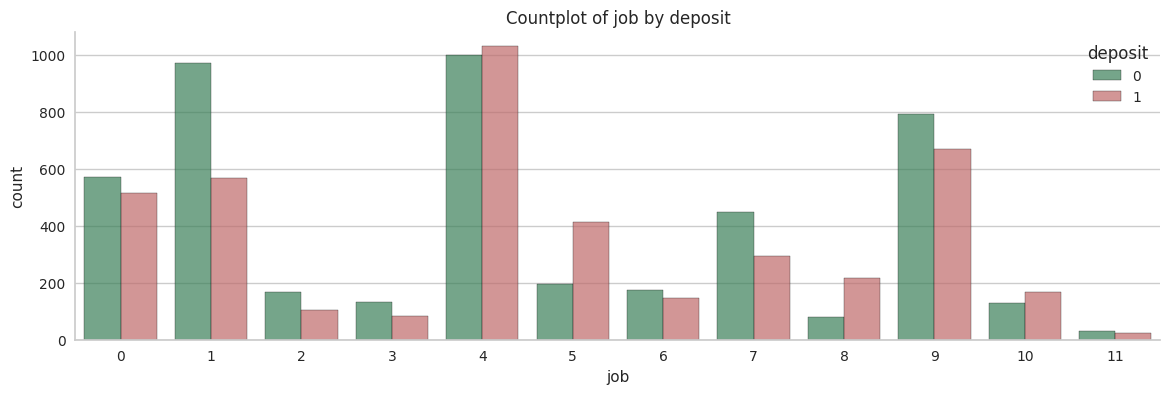

In [16]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='deposit', edgecolor="black", alpha=0.7, data=traindf)
    sns.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='deposit',edgecolor="black", alpha=0.7, data=traindf)
sns.despine()
plt.title("Countplot of job by deposit")
plt.show()

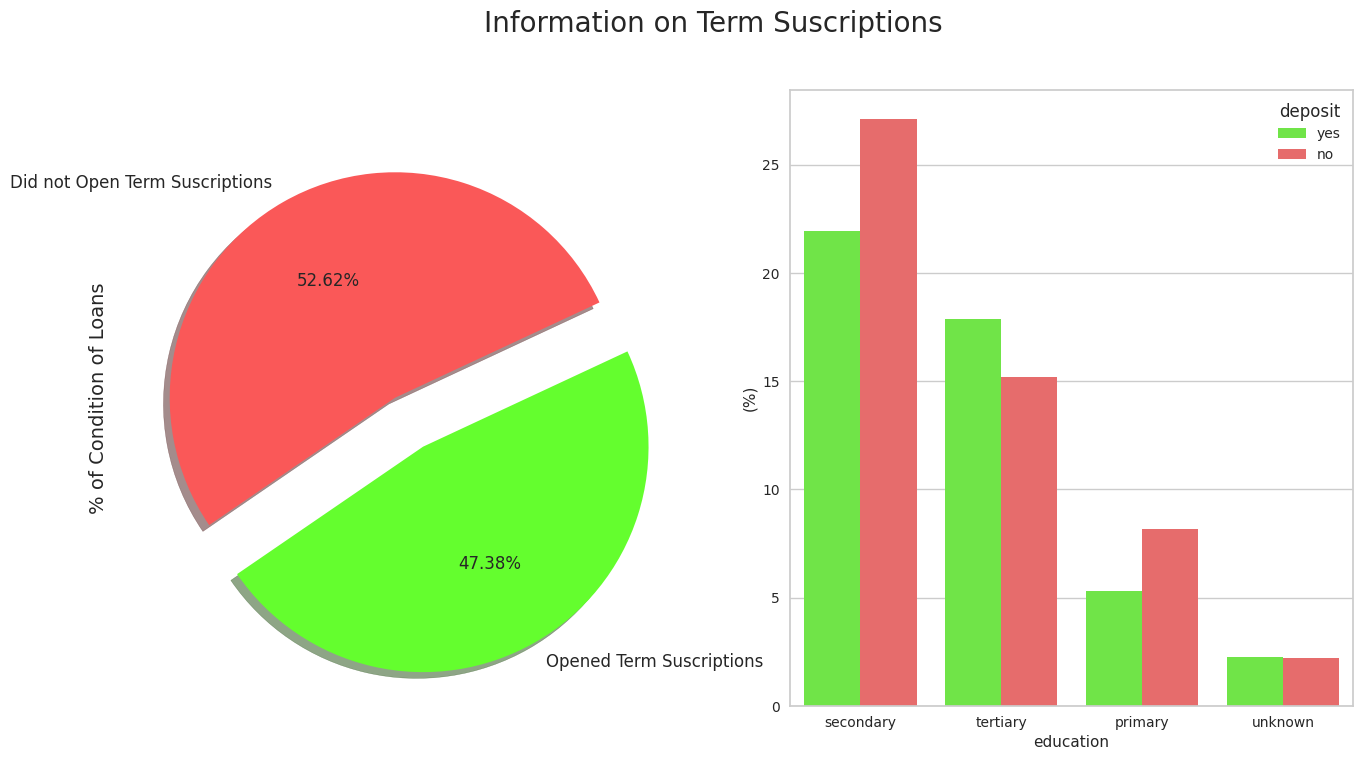

In [17]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"
plt.suptitle('Information on Term Suscriptions', fontsize=20)
df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)
# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]
sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

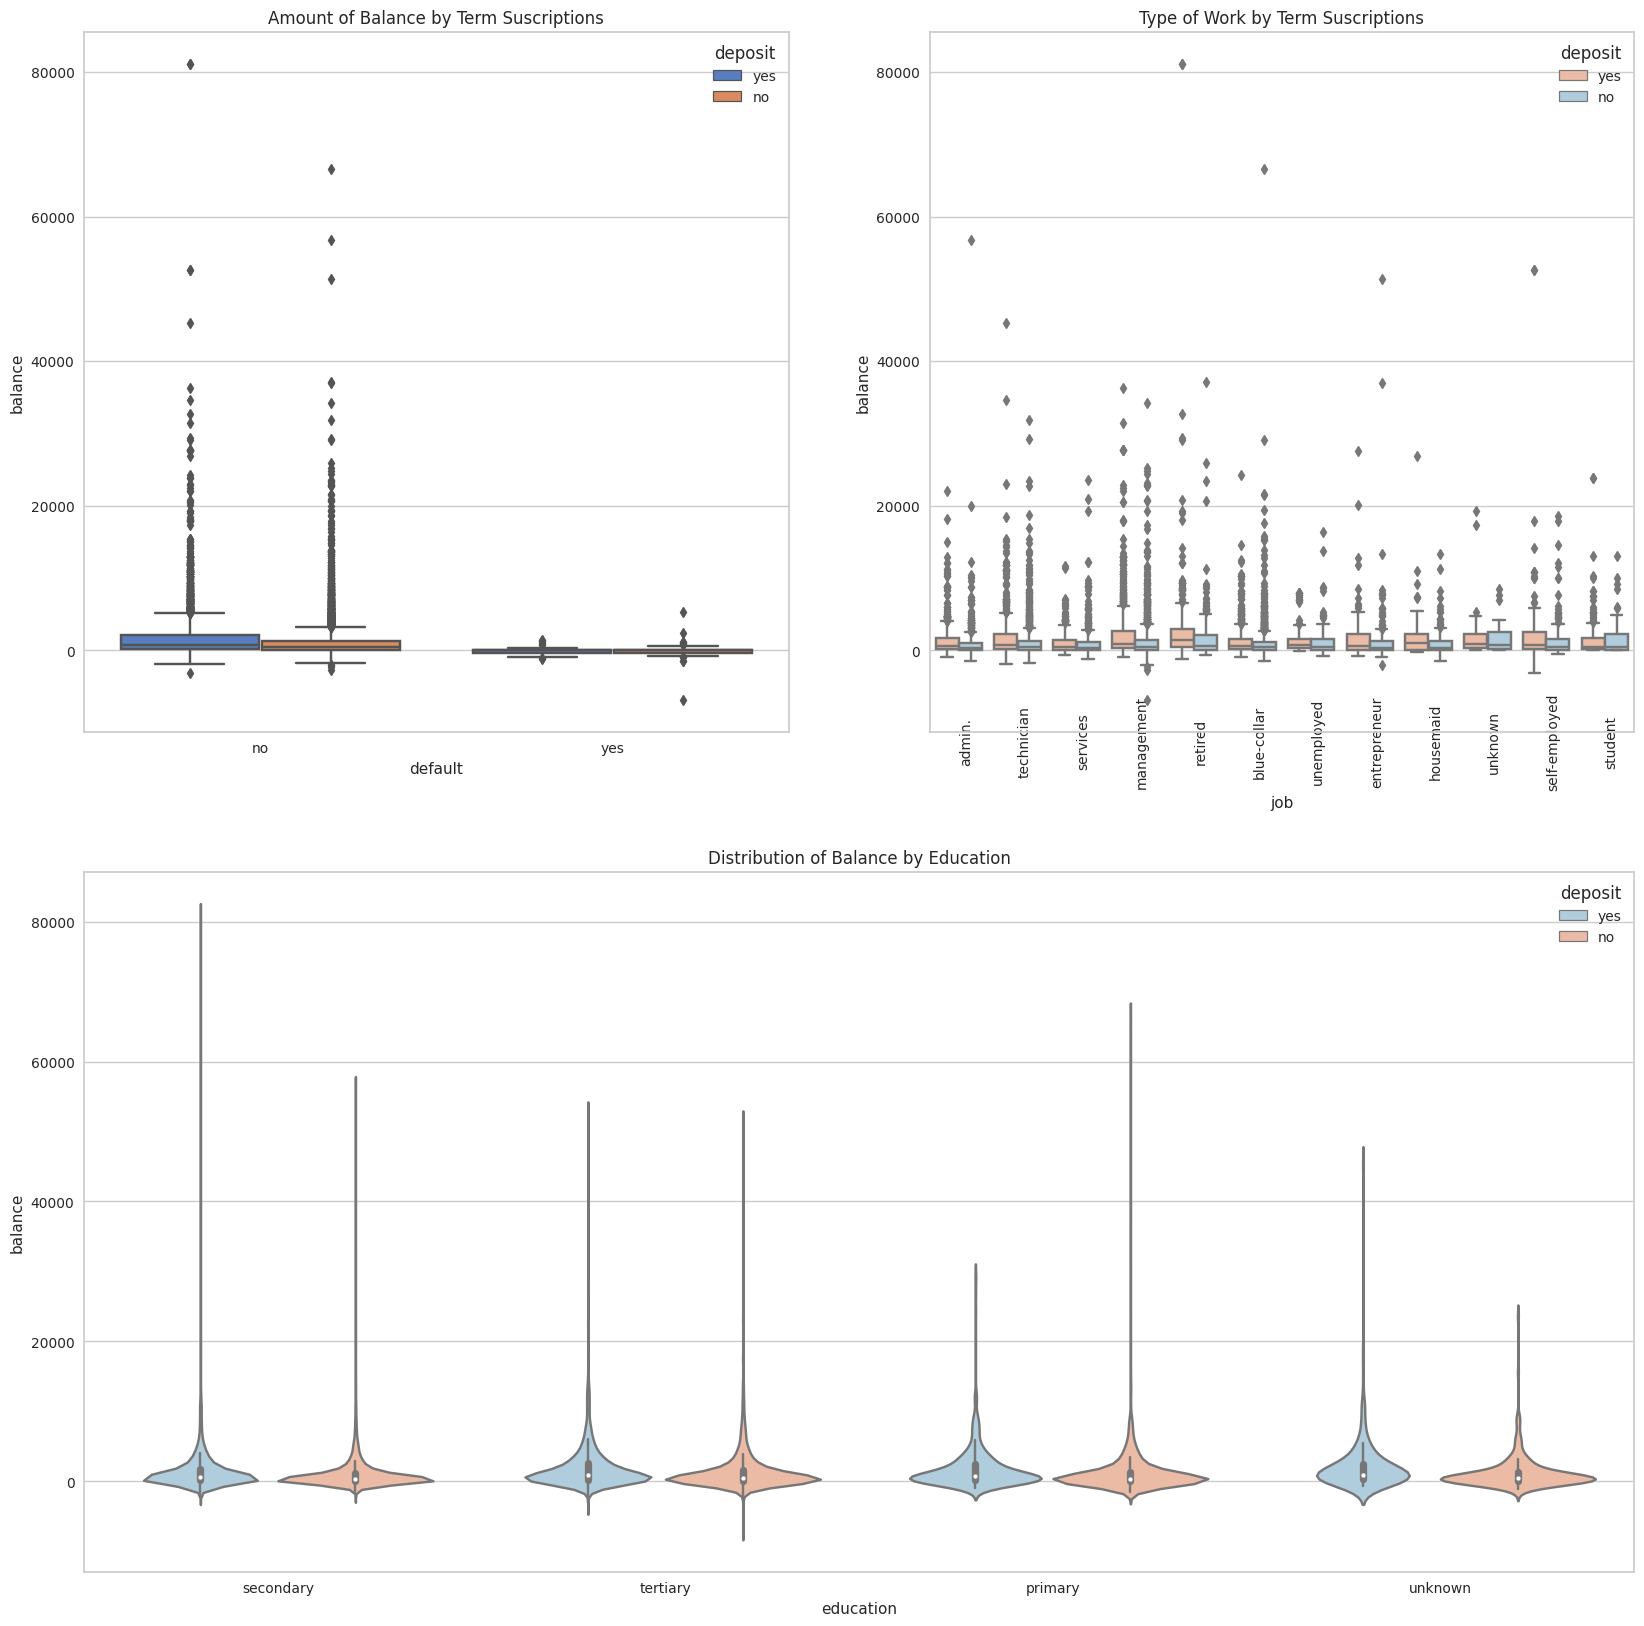

In [18]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)
g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)
g.set_title("Amount of Balance by Term Suscriptions")
# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")
g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)
g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")
g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")
g2.set_title("Distribution of Balance by Education")
plt.show()

In [19]:
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00


In [20]:
import squarify
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
df = df.drop(df.loc[df["balance"] == 0].index)


x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')


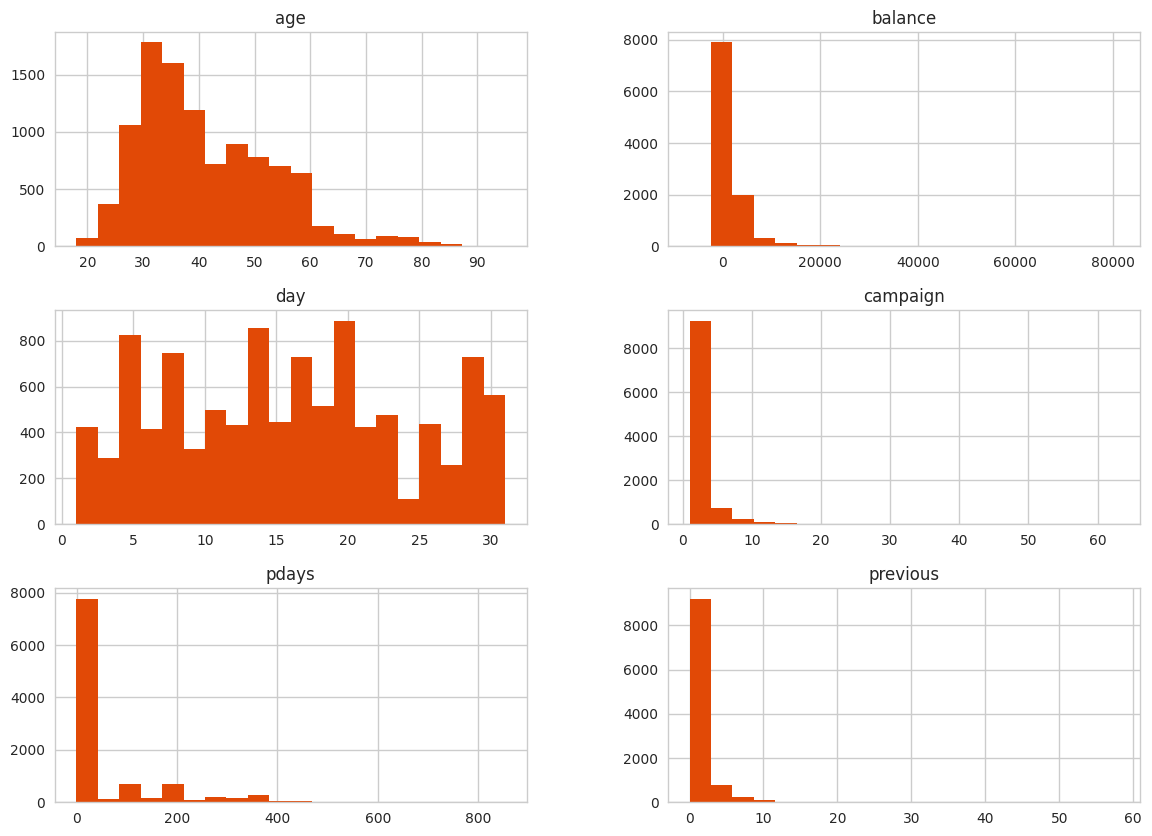

In [21]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [22]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [28]:
# Balance Distribution

# Create a Balance Category
df["balance_status"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_status"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_status"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_status"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')


In [29]:
# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/opt/conda/lib/python3.10/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [32]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    df,
    x='deposit',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [34]:
df['marital/education'] = np.nan
lst = [df]
for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes,low,married/secondary
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes,low,married/secondary
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes,low,married/tertiary


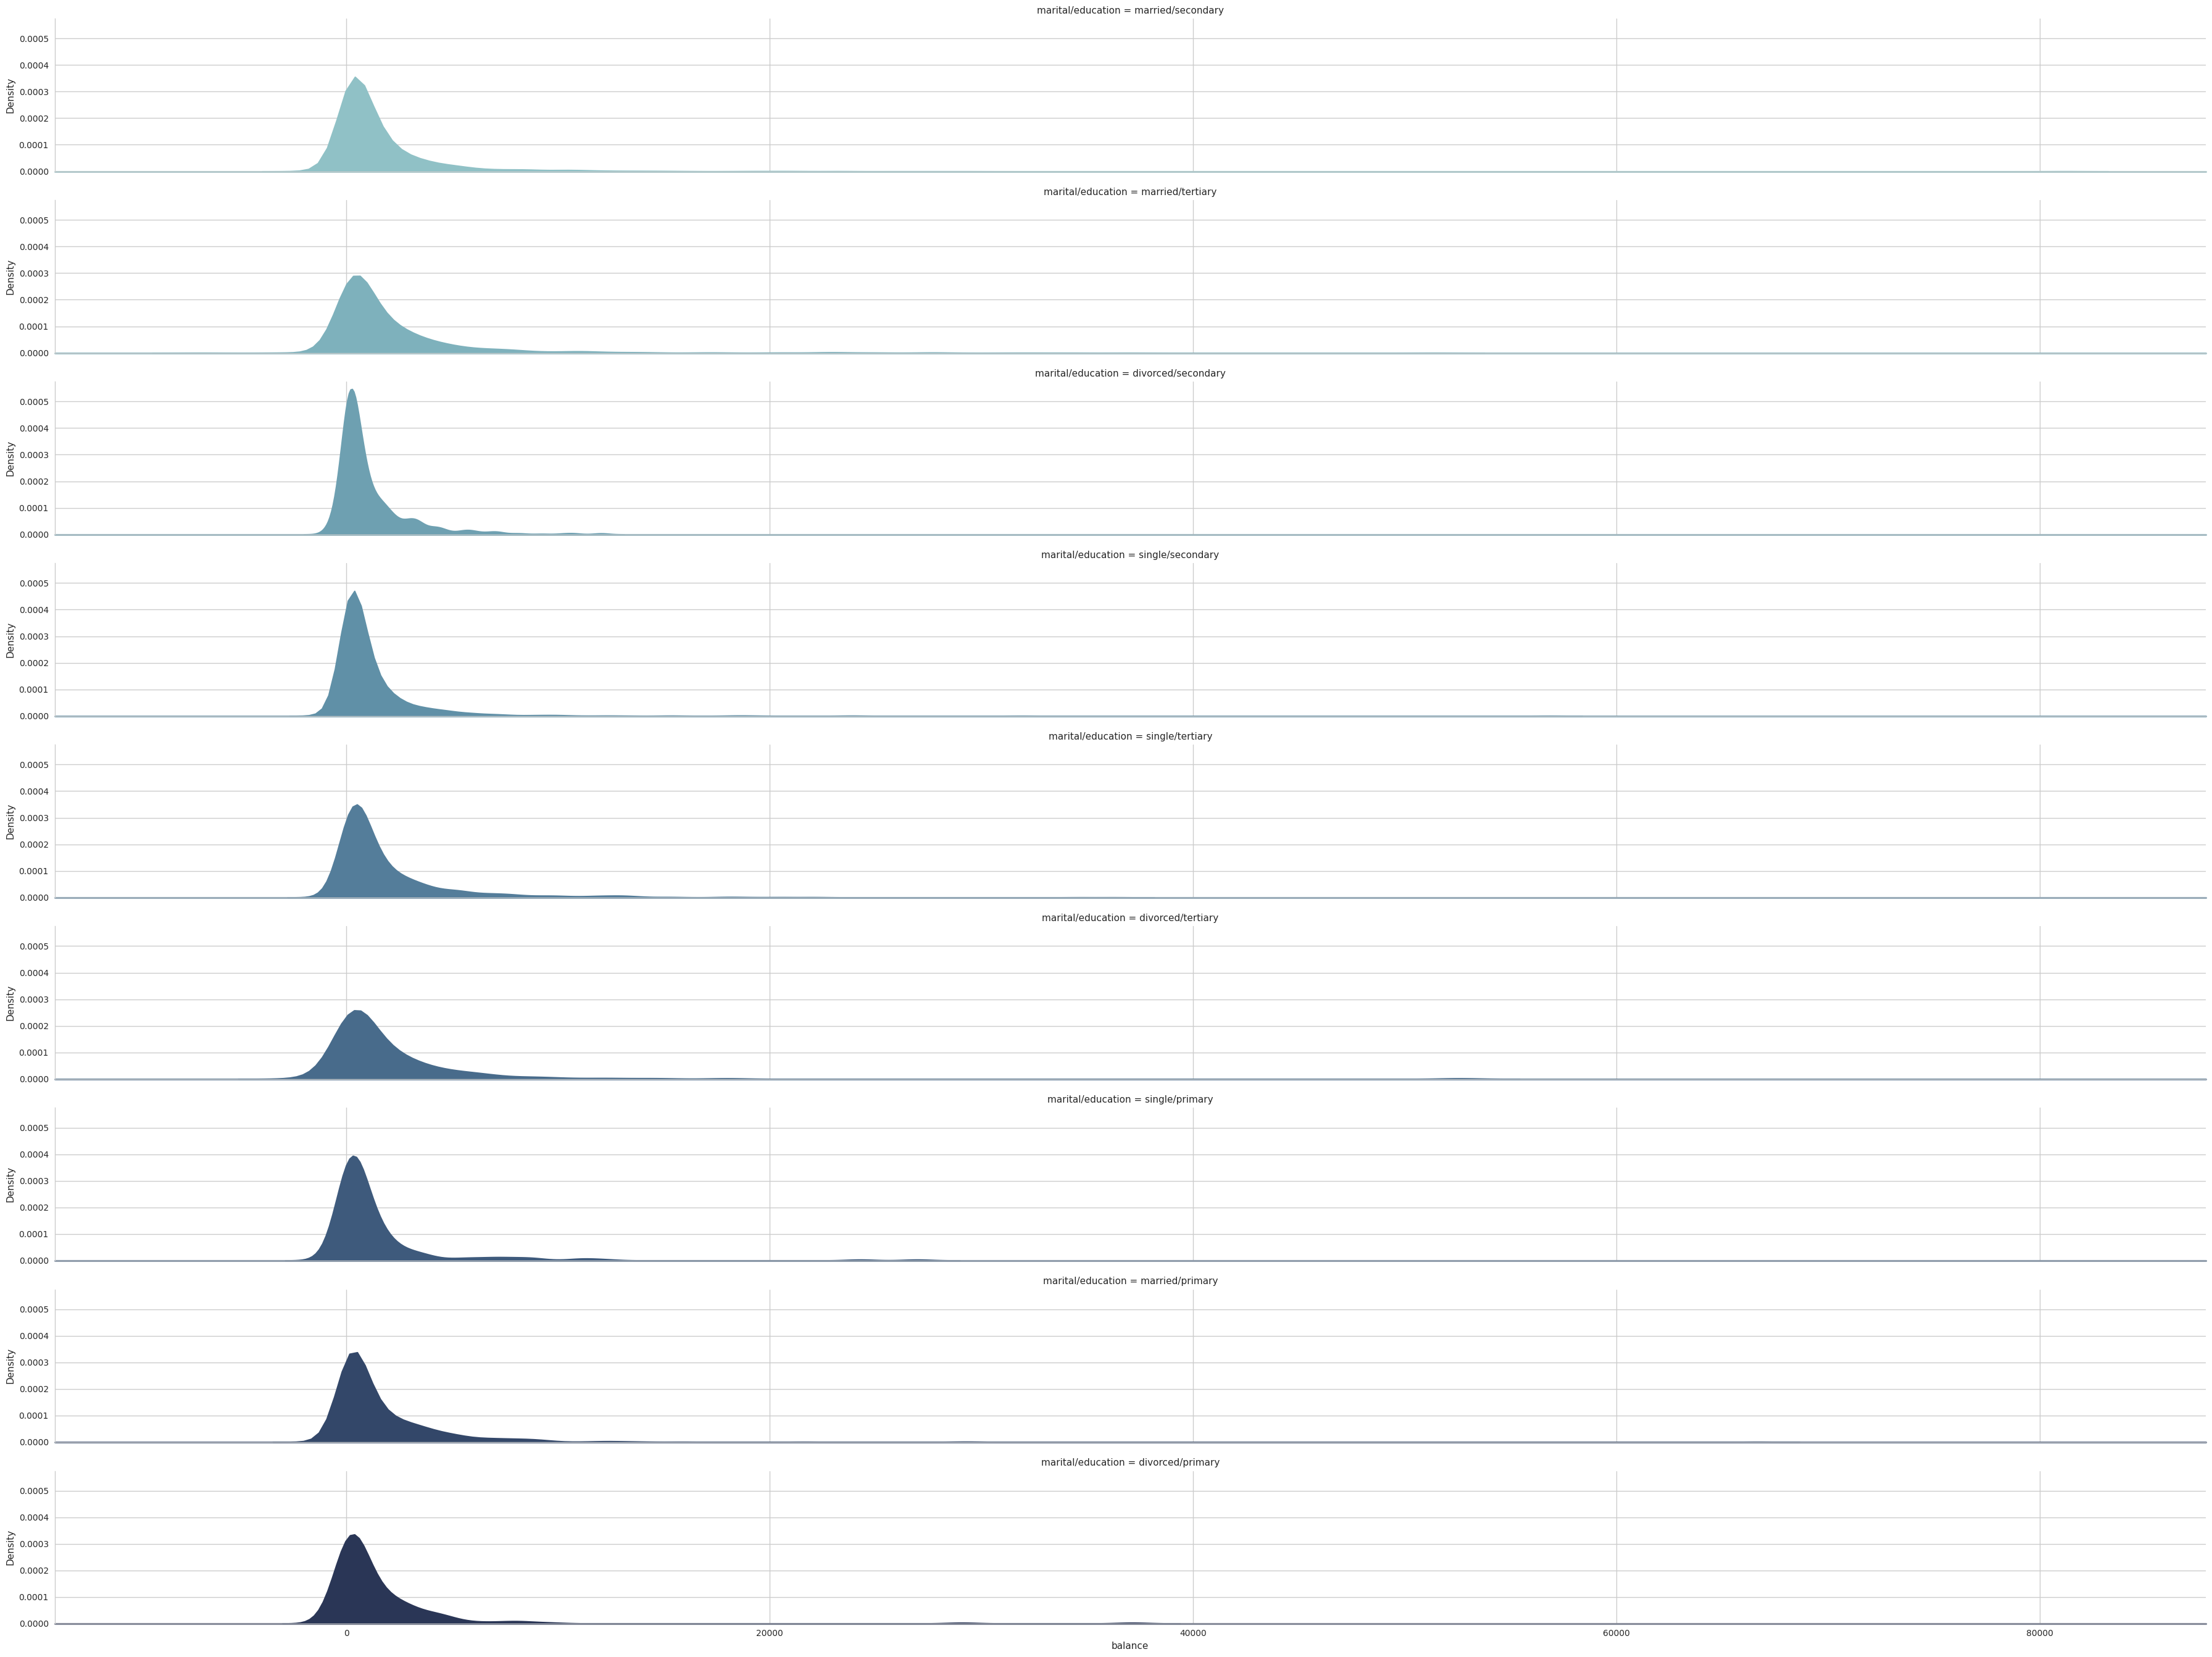

In [35]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)
g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

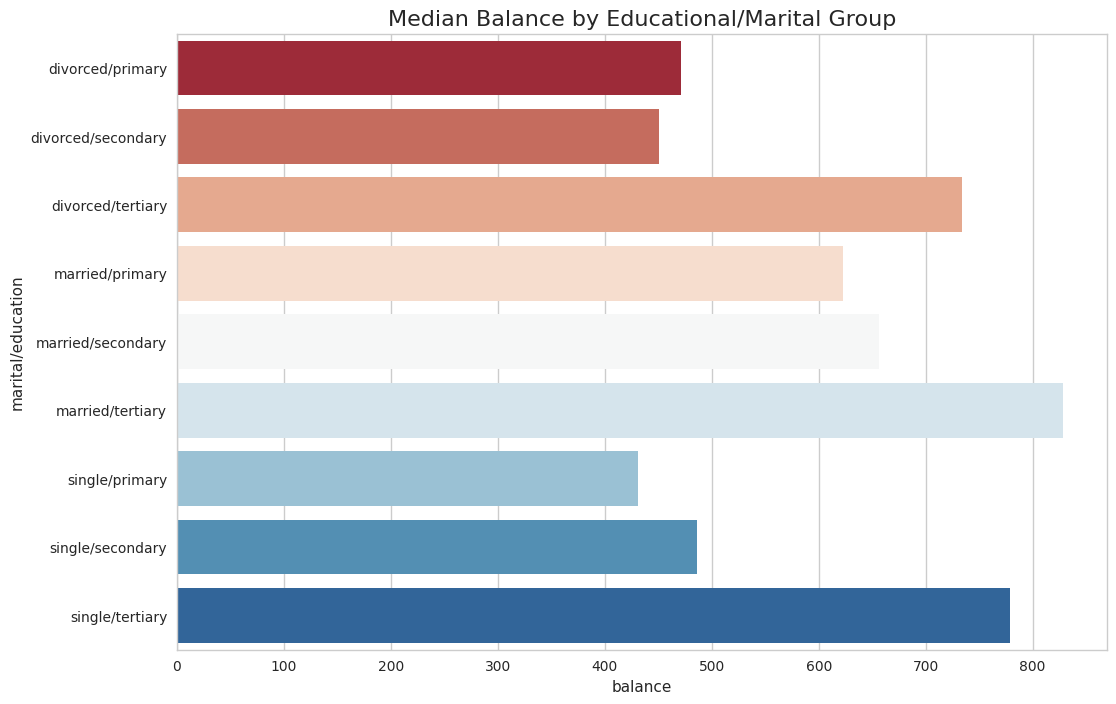

In [36]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))
sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [37]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

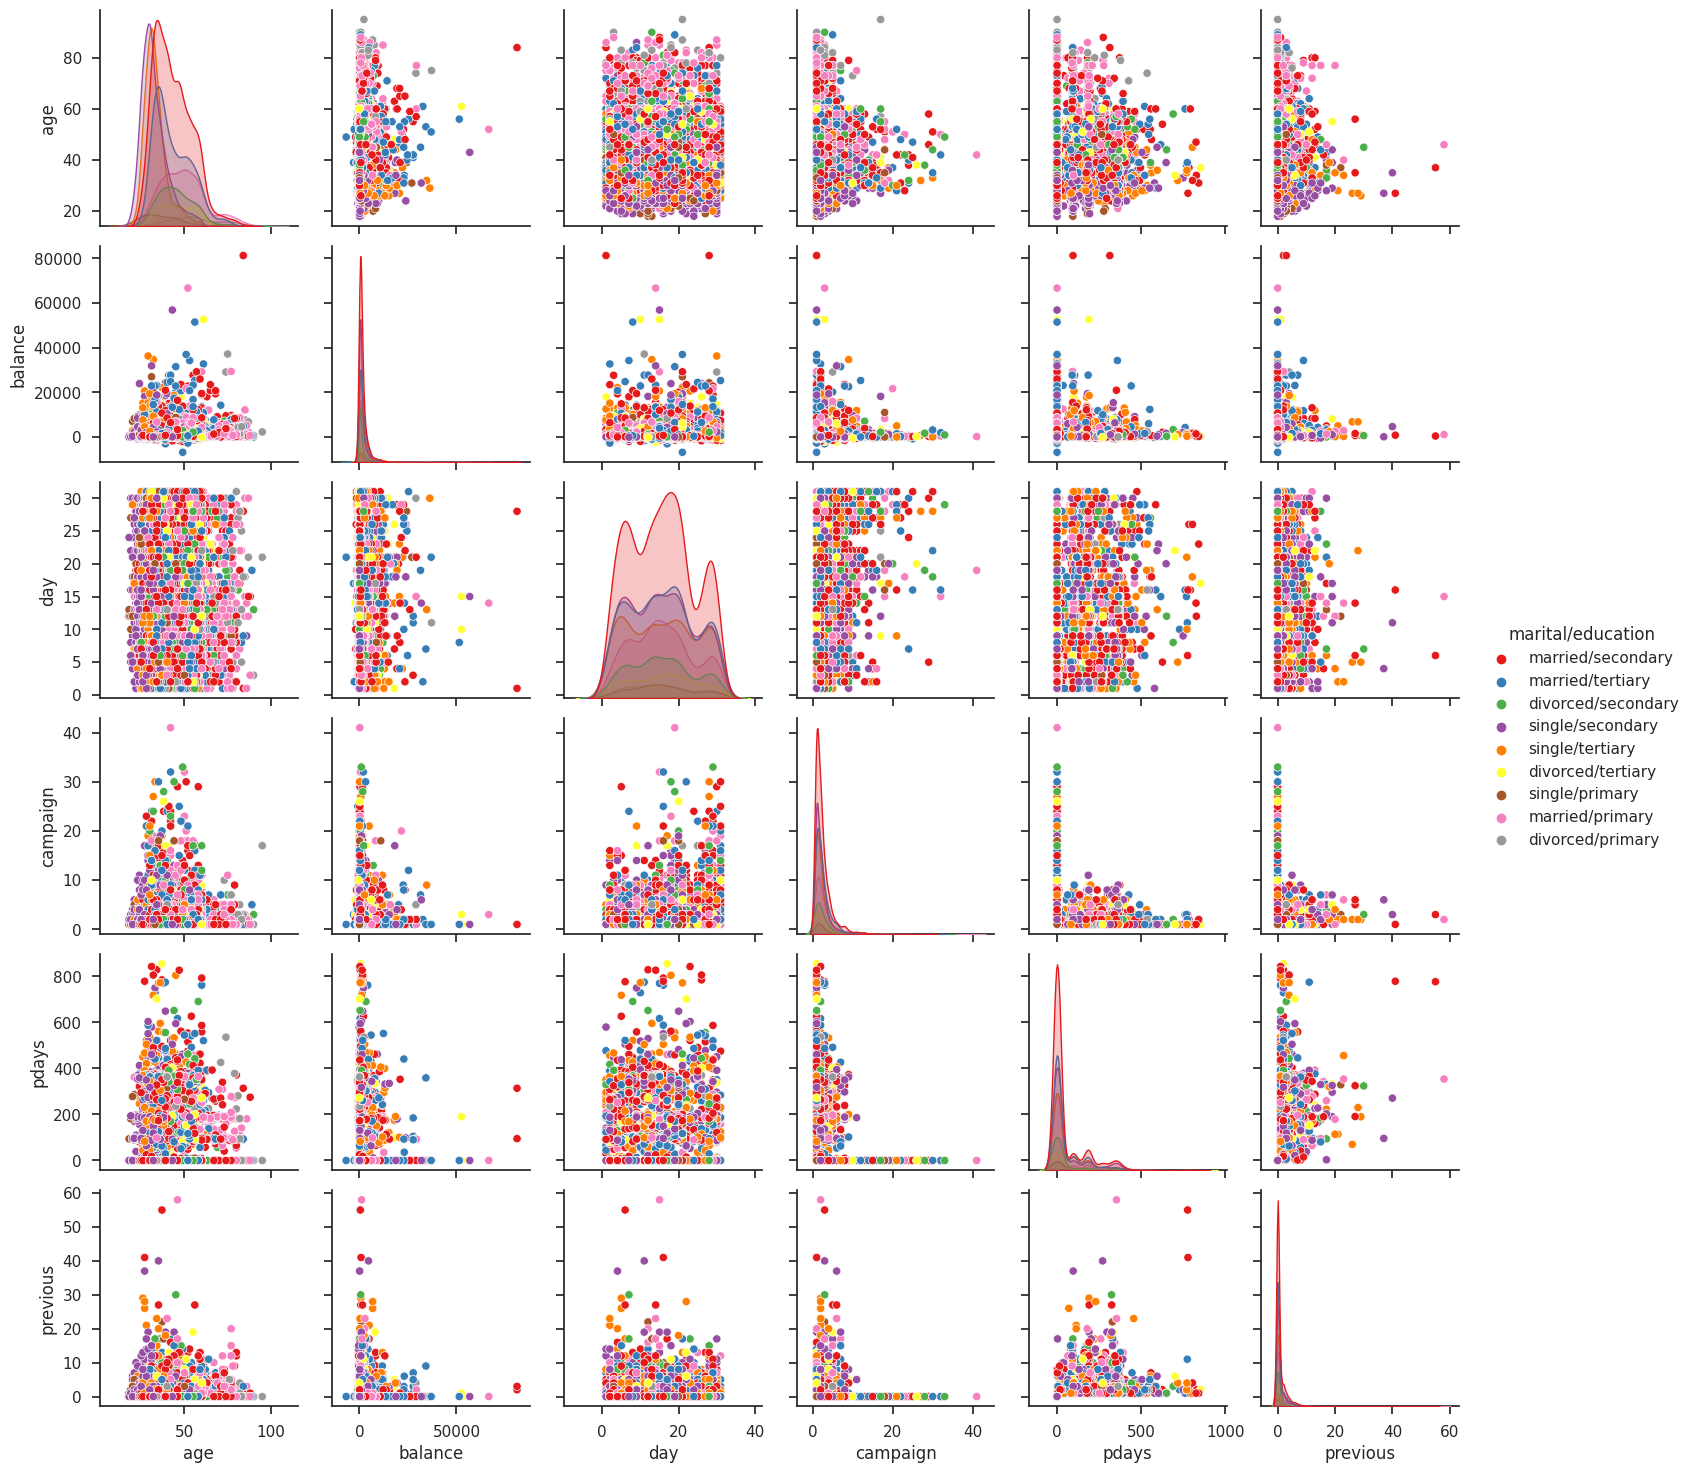

In [38]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

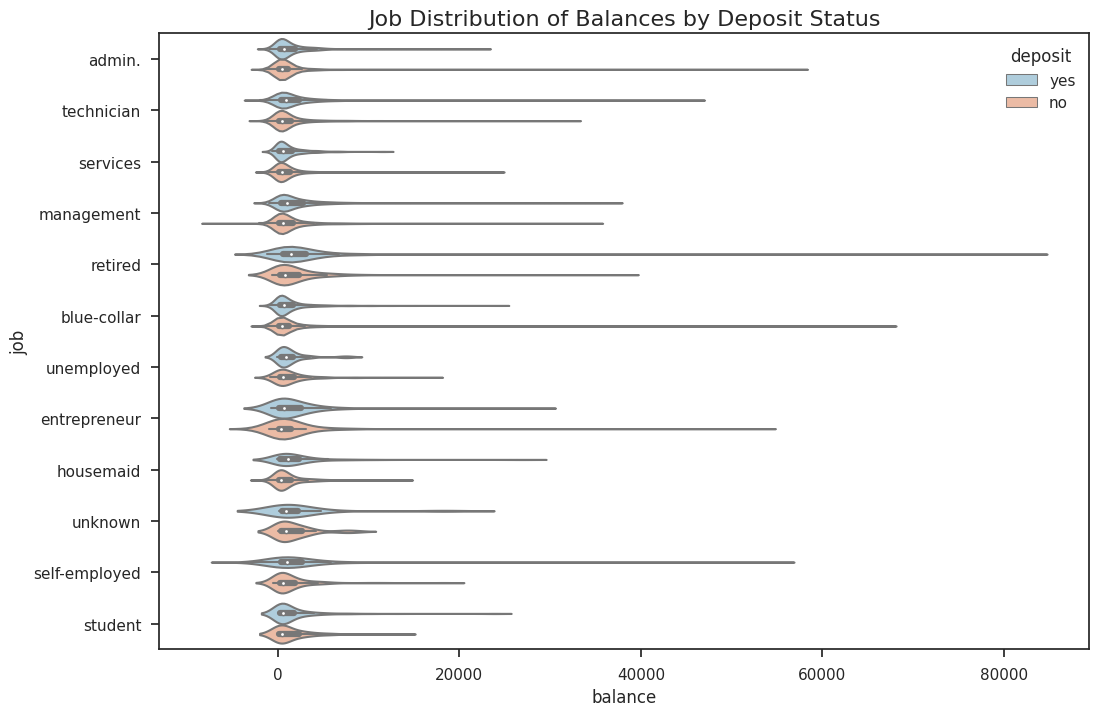

In [39]:
fig = plt.figure(figsize=(12,8))
sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=df);
plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)
plt.show()


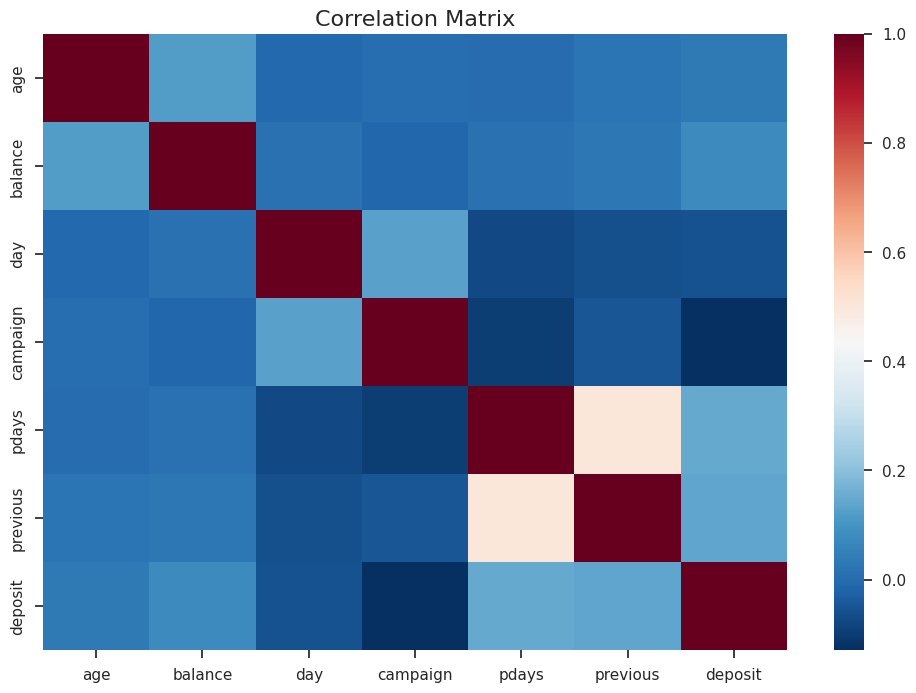

In [40]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

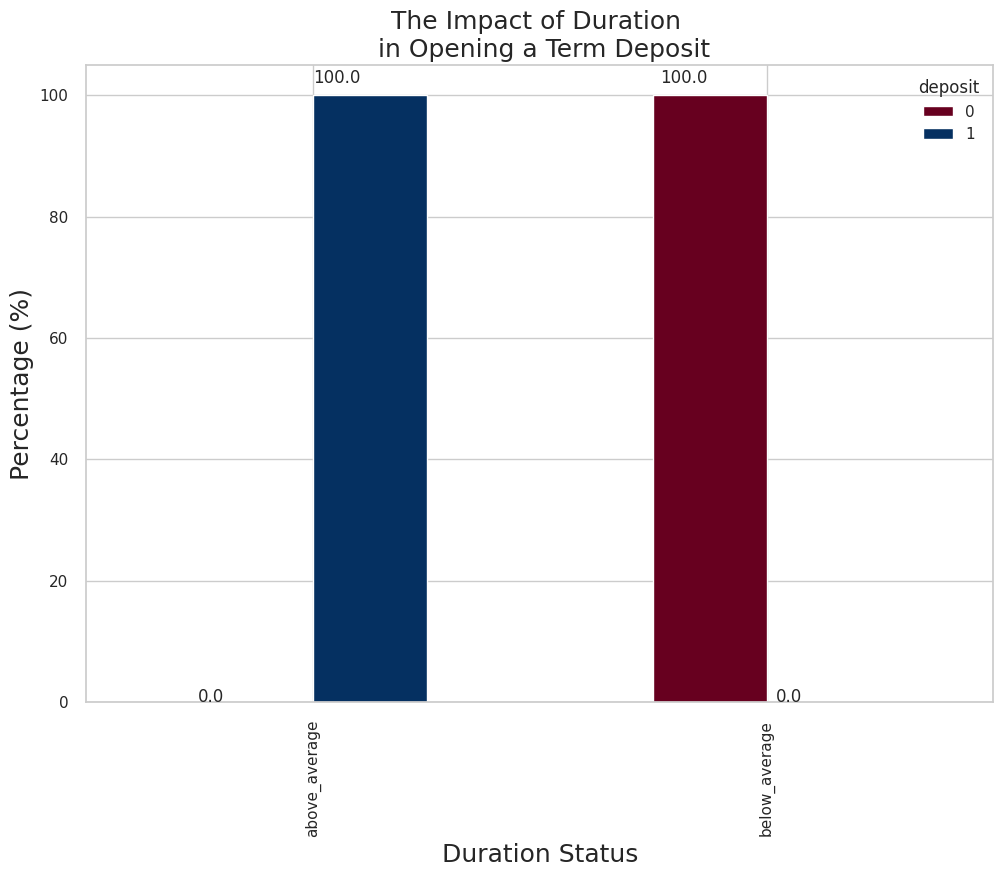

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['deposit'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["deposit"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["deposit"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

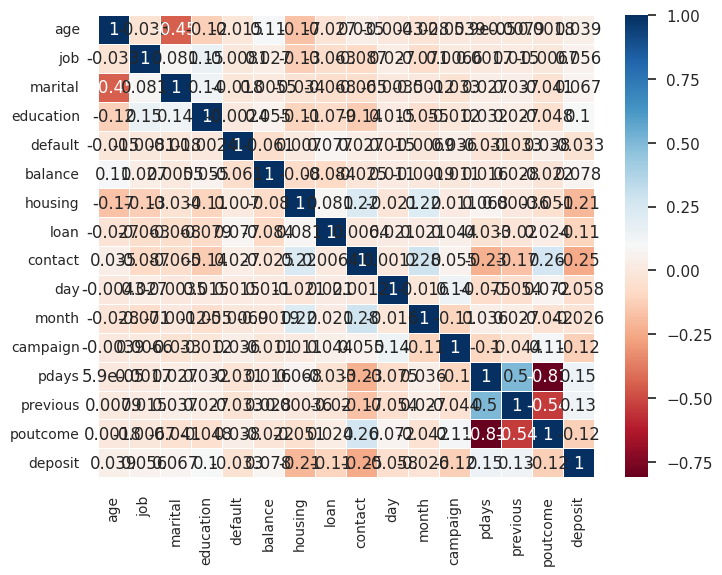

In [53]:
def correlation_matrix(df, cols):
     fig = plt.gcf()
     fig.set_size_inches(8, 6)
     plt.xticks(fontsize=10)
     plt.yticks(fontsize=10)
     fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
     plt.show(block=True)
correlation_matrix(traindf, traindf.columns)

In [61]:
df=pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')
print(df.shape)

(11162, 17)


In [62]:
#encoding target label
LE=LabelEncoder()
df['deposit']=LE.fit_transform(df.deposit.values)
#encoding categorical features
df=pd.get_dummies(df)

In [63]:
#partitioning again
for train_index, test_index in sss.split(df.drop("deposit",axis=1), df.deposit):
    traindf=df.loc[train_index]
    testdf= df.loc[test_index]

In [64]:
#partition x/y
xtrain=traindf.drop('deposit', axis=1)
ytrain=traindf.deposit
xtest=testdf.drop('deposit', axis=1)
ytest=testdf.deposit

In [65]:
# pipeline combining transformers and estimator
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())
 
# grid searh to choose the best (combination of) hyperparameters
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
               scoring='accuracy',
               cv=10)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_knn_scores = cross_val_score(gs_knn, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_knn.fit(xtrain, ytrain)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(xtrain, ytrain)

print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(xtrain, ytrain)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(xtest, ytest)*100))

Train Accuracy:   81.8%
CV Mean Accuracy: 75.4%
Test Accuracy:    75.2%


In [66]:
# pipeline combining transformers and estimator
pipe_svm= make_pipeline(StandardScaler(), SVC(random_state=1))

# grid searh to choose the best (combination of) hyperparameters
r=[0.1,1,10]
pg_svm=[{'svc__C':r, 'svc__kernel':['linear']},
        {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
gs_svm=GridSearchCV(estimator= pipe_svm,
               param_grid= pg_svm,
               scoring='accuracy',
               cv=2)
# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_svm_scores = cross_val_score(gs_svm, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)
# fit, and fit with best estimator
gs_svm.fit(xtrain, ytrain)
gs_svm_best=gs_svm.best_estimator_
gs_svm_best.fit(xtrain, ytrain)
print('Train Accuracy:   {0:.1f}%'.format(gs_svm.score(xtrain, ytrain)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_svm_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_svm.score(xtest, ytest)*100))

Train Accuracy:   83.4%
CV Mean Accuracy: 82.9%
Test Accuracy:    81.6%


In [67]:
rf= RandomForestClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_rf={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

gs_rf=GridSearchCV(estimator= rf,
               param_grid= pg_rf,
               scoring='accuracy',
               cv=2)
# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_rf_scores = cross_val_score(gs_rf, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)
# fit, and fit with best estimator
gs_rf.fit(xtrain, ytrain)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(xtrain, ytrain)
print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(xtrain, ytrain)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(xtest, ytest)*100))

Train Accuracy:   99.4%
CV Mean Accuracy: 85.8%
Test Accuracy:    83.7%


In [68]:
# estimator
xb= xgb.XGBClassifier(random_state=1)
# grid searh to choose the best (combination of) hyperparameters
pg_xb={'n_estimators':[100,200,400], 'max_depth':[20,40,50]}
gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='accuracy',
               cv=2)
# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_xb_scores = cross_val_score(gs_xb, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)
# fit, and fit with best estimator
gs_xb.fit(xtrain, ytrain)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(xtrain, ytrain)
print('Train Accuracy:   {0:.1f}%'.format(gs_xb.score(xtrain, ytrain)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_xb_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_xb.score(xtest, ytest)*100))

Train Accuracy:   100.0%
CV Mean Accuracy: 85.5%
Test Accuracy:    84.4%


In [69]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
dt = DecisionTreeClassifier(random_state=1)
# Parameter grid
pg_dt = {'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]}
# Grid search
gs_dt = GridSearchCV(estimator=dt, param_grid=pg_dt, scoring='accuracy', cv=2)
# Nested cross-validation
gs_dt_scores = cross_val_score(gs_dt, X=xtrain, y=ytrain, cv=5, scoring='accuracy', n_jobs=-1)
# Fit model
gs_dt.fit(xtrain, ytrain)
gs_dt_best = gs_dt.best_estimator_
gs_dt_best.fit(xtrain, ytrain)
# Print results
print('Train Accuracy:   {0:.1f}%'.format(gs_dt.score(xtrain, ytrain) * 100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_dt_scores) * 100))
print('Test Accuracy:    {0:.1f}%'.format(gs_dt.score(xtest, ytest) * 100))


Train Accuracy:   87.5%
CV Mean Accuracy: 81.9%
Test Accuracy:    80.3%


In [70]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the model
ada = AdaBoostClassifier(random_state=1)
# Parameter grid
pg_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
# Grid search
gs_ada = GridSearchCV(estimator=ada, param_grid=pg_ada, scoring='accuracy', cv=2)
# Nested cross-validation
gs_ada_scores = cross_val_score(gs_ada, X=xtrain, y=ytrain, cv=5, scoring='accuracy', n_jobs=-1)
# Fit model
gs_ada.fit(xtrain, ytrain)
gs_ada_best = gs_ada.best_estimator_
gs_ada_best.fit(xtrain, ytrain)
# Print results
print('Train Accuracy:   {0:.1f}%'.format(gs_ada.score(xtrain, ytrain) * 100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_ada_scores) * 100))
print('Test Accuracy:    {0:.1f}%'.format(gs_ada.score(xtest, ytest) * 100))


Train Accuracy:   84.0%
CV Mean Accuracy: 82.9%
Test Accuracy:    82.6%


In [71]:
from catboost import CatBoostClassifier
# Initialize the model
cat = CatBoostClassifier(random_state=1, silent=True)
# Parameter grid
pg_cat = {'iterations': [100, 200, 300], 'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1, 1]}
# Grid search
gs_cat = GridSearchCV(estimator=cat, param_grid=pg_cat, scoring='accuracy', cv=2)
# Nested cross-validation
gs_cat_scores = cross_val_score(gs_cat, X=xtrain, y=ytrain, cv=5, scoring='accuracy', n_jobs=-1)
# Fit model
gs_cat.fit(xtrain, ytrain)
gs_cat_best = gs_cat.best_estimator_
gs_cat_best.fit(xtrain, ytrain)
# Print results
print('Train Accuracy:   {0:.1f}%'.format(gs_cat.score(xtrain, ytrain) * 100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_cat_scores) * 100))
print('Test Accuracy:    {0:.1f}%'.format(gs_cat.score(xtest, ytest) * 100))


Train Accuracy:   90.4%
CV Mean Accuracy: 86.6%
Test Accuracy:    85.9%


In [72]:
from sklearn.linear_model import LogisticRegression
# Initialize the model
lr = LogisticRegression(random_state=1, max_iter=1000)
# Parameter grid
pg_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga']}
# Grid search
gs_lr = GridSearchCV(estimator=lr, param_grid=pg_lr, scoring='accuracy', cv=2)
# Nested cross-validation
gs_lr_scores = cross_val_score(gs_lr, X=xtrain, y=ytrain, cv=5, scoring='accuracy', n_jobs=-1)
# Fit model
gs_lr.fit(xtrain, ytrain)
gs_lr_best = gs_lr.best_estimator_
gs_lr_best.fit(xtrain, ytrain)
# Print results
print('Train Accuracy:   {0:.1f}%'.format(gs_lr.score(xtrain, ytrain) * 100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_lr_scores) * 100))
print('Test Accuracy:    {0:.1f}%'.format(gs_lr.score(xtest, ytest) * 100))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Train Accuracy:   82.6%
CV Mean Accuracy: 82.1%
Test Accuracy:    81.7%


In [73]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the model
et = ExtraTreesClassifier(random_state=1)

# Parameter grid
pg_et = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, 40, 50]}

# Grid search
gs_et = GridSearchCV(estimator=et, param_grid=pg_et, scoring='accuracy', cv=2)

# Nested cross-validation
gs_et_scores = cross_val_score(gs_et, X=xtrain, y=ytrain, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
gs_et.fit(xtrain, ytrain)
gs_et_best = gs_et.best_estimator_
gs_et_best.fit(xtrain, ytrain)

# Print results
print('Train Accuracy:   {0:.1f}%'.format(gs_et.score(xtrain, ytrain) * 100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_et_scores) * 100))
print('Test Accuracy:    {0:.1f}%'.format(gs_et.score(xtest, ytest) * 100))


Train Accuracy:   98.8%
CV Mean Accuracy: 83.4%
Test Accuracy:    82.2%


In [74]:
from sklearn.naive_bayes import GaussianNB
# Initialize the model
gnb = GaussianNB()
# No hyperparameters to tune for GaussianNB, so just cross-validation
gs_gnb_scores = cross_val_score(gnb, X=xtrain, y=ytrain, cv=5, scoring='accuracy', n_jobs=-1)
# Fit model
gnb.fit(xtrain, ytrain)
# Print results
print('Train Accuracy:   {0:.1f}%'.format(gnb.score(xtrain, ytrain) * 100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_gnb_scores) * 100))
print('Test Accuracy:    {0:.1f}%'.format(gnb.score(xtest, ytest) * 100))


Train Accuracy:   73.9%
CV Mean Accuracy: 73.6%
Test Accuracy:    74.6%


In [76]:
results = []
results.append({
    'Model': 'K Nearest Neighbors',
    'Train Accuracy': gs_knn.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_knn_scores) * 100,
    'Test Accuracy': gs_knn.score(xtest, ytest) * 100
})
results.append({
    'Model': 'Support Vector Machine',
    'Train Accuracy': gs_svm.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_svm_scores) * 100,
    'Test Accuracy': gs_svm.score(xtest, ytest) * 100
})
results.append({
    'Model': 'Random Forest',
    'Train Accuracy': gs_rf.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_rf_scores) * 100,
    'Test Accuracy': gs_rf.score(xtest, ytest) * 100
})
results.append({
    'Model': 'XG Boost',
    'Train Accuracy': gs_xb.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_xb_scores) * 100,
    'Test Accuracy': gs_xb.score(xtest, ytest) * 100
})
results.append({
    'Model': 'Decision Tree',
    'Train Accuracy': gs_dt.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_dt_scores) * 100,
    'Test Accuracy': gs_dt.score(xtest, ytest) * 100
})
results.append({
    'Model': 'AdaBoost',
    'Train Accuracy': gs_ada.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_ada_scores) * 100,
    'Test Accuracy': gs_ada.score(xtest, ytest) * 100
})
results.append({
    'Model': 'CatBoost',
    'Train Accuracy': gs_cat.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_cat_scores) * 100,
    'Test Accuracy': gs_cat.score(xtest, ytest) * 100
})
results.append({
    'Model': 'Logistic Regression',
    'Train Accuracy': gs_lr.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_lr_scores) * 100,
    'Test Accuracy': gs_lr.score(xtest, ytest) * 100
})
results.append({
    'Model': 'Extra Trees',
    'Train Accuracy': gs_et.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_et_scores) * 100,
    'Test Accuracy': gs_et.score(xtest, ytest) * 100
})
results.append({
    'Model': 'Gaussian Naive Bayes',
    'Train Accuracy': gnb.score(xtrain, ytrain) * 100,
    'CV Mean Accuracy': np.mean(gs_gnb_scores) * 100,
    'Test Accuracy': gnb.score(xtest, ytest) * 100
})
# Save results to CSV
df_results = pd.DataFrame(results)
df_results.to_csv('models_results.csv', index=False)
print(df_results)

                    Model  Train Accuracy  CV Mean Accuracy  Test Accuracy
0     K Nearest Neighbors       81.812073         75.383496      75.190327
1  Support Vector Machine       83.368798         82.920844      81.594268
2           Random Forest       99.395229         85.787824      83.699060
3                XG Boost      100.000000         85.474217      84.415584
4           Decision Tree       87.512599         81.924015      80.250784
5                AdaBoost       84.040766         82.909646      82.579489
6                CatBoost       90.357263         86.582978      85.893417
7     Logistic Regression       82.551238         82.103256      81.683833
8             Extra Trees       98.756860         83.379996      82.221227
9    Gaussian Naive Bayes       73.916452         73.580340      74.563368
